# R² Score (Coeficiente de determinación)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.datasets import make_regression
import seaborn as sns

# Configuración estética
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [4]:
# 1. Generar datos (simulando precios de viviendas)
np.random.seed(42)
X, y = make_regression(n_samples=1000, n_features=5, noise=20, random_state=42)

# Escalar precios a miles (100k–600k)
y = (y - y.min()) / (y.max() - y.min()) * 500 + 100

# Nombres de características
feature_names = ['Metros_cuadrados', 'Habitaciones', 'Ubicacion_X', 'Ubicacion_Y', 'Antiguedad']


In [6]:
# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape[0]}")
print(f"Datos de prueba: {X_test.shape[0]}")


Datos de entrenamiento: 800
Datos de prueba: 200


In [8]:
# 3. Modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# 4. Evaluación
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({'Modelo': name, 'R² Score': r2, 'MAE': mae})
    
    print(f"\n{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: {mae:.2f}k")
    print(f"  El modelo explica {r2*100:.1f}% de la variabilidad en precios")



Regresión Lineal:
  R² Score: 0.8942
  MAE: 19.77k
  El modelo explica 89.4% de la variabilidad en precios

Random Forest:
  R² Score: 0.8088
  MAE: 25.64k
  El modelo explica 80.9% de la variabilidad en precios


In [10]:
# 5. Cálculo manual de R²
def calculate_r2_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot), ss_res, ss_tot

# Verificar con Random Forest
y_pred_rf = predictions['Random Forest']
r2_manual, ss_res, ss_tot = calculate_r2_manual(y_test, y_pred_rf)

print("\n--- Verificación del cálculo manual ---")
print(f"R² sklearn: {r2_score(y_test, y_pred_rf):.6f}")
print(f"R² manual : {r2_manual:.6f}")
print(f"SS_res: {ss_res:.2f}")
print(f"SS_tot: {ss_tot:.2f}")
print(f"Proporción SS_res/SS_tot: {ss_res/ss_tot:.4f}")



--- Verificación del cálculo manual ---
R² sklearn: 0.808828
R² manual : 0.808828
SS_res: 215063.05
SS_tot: 1124974.22
Proporción SS_res/SS_tot: 0.1912


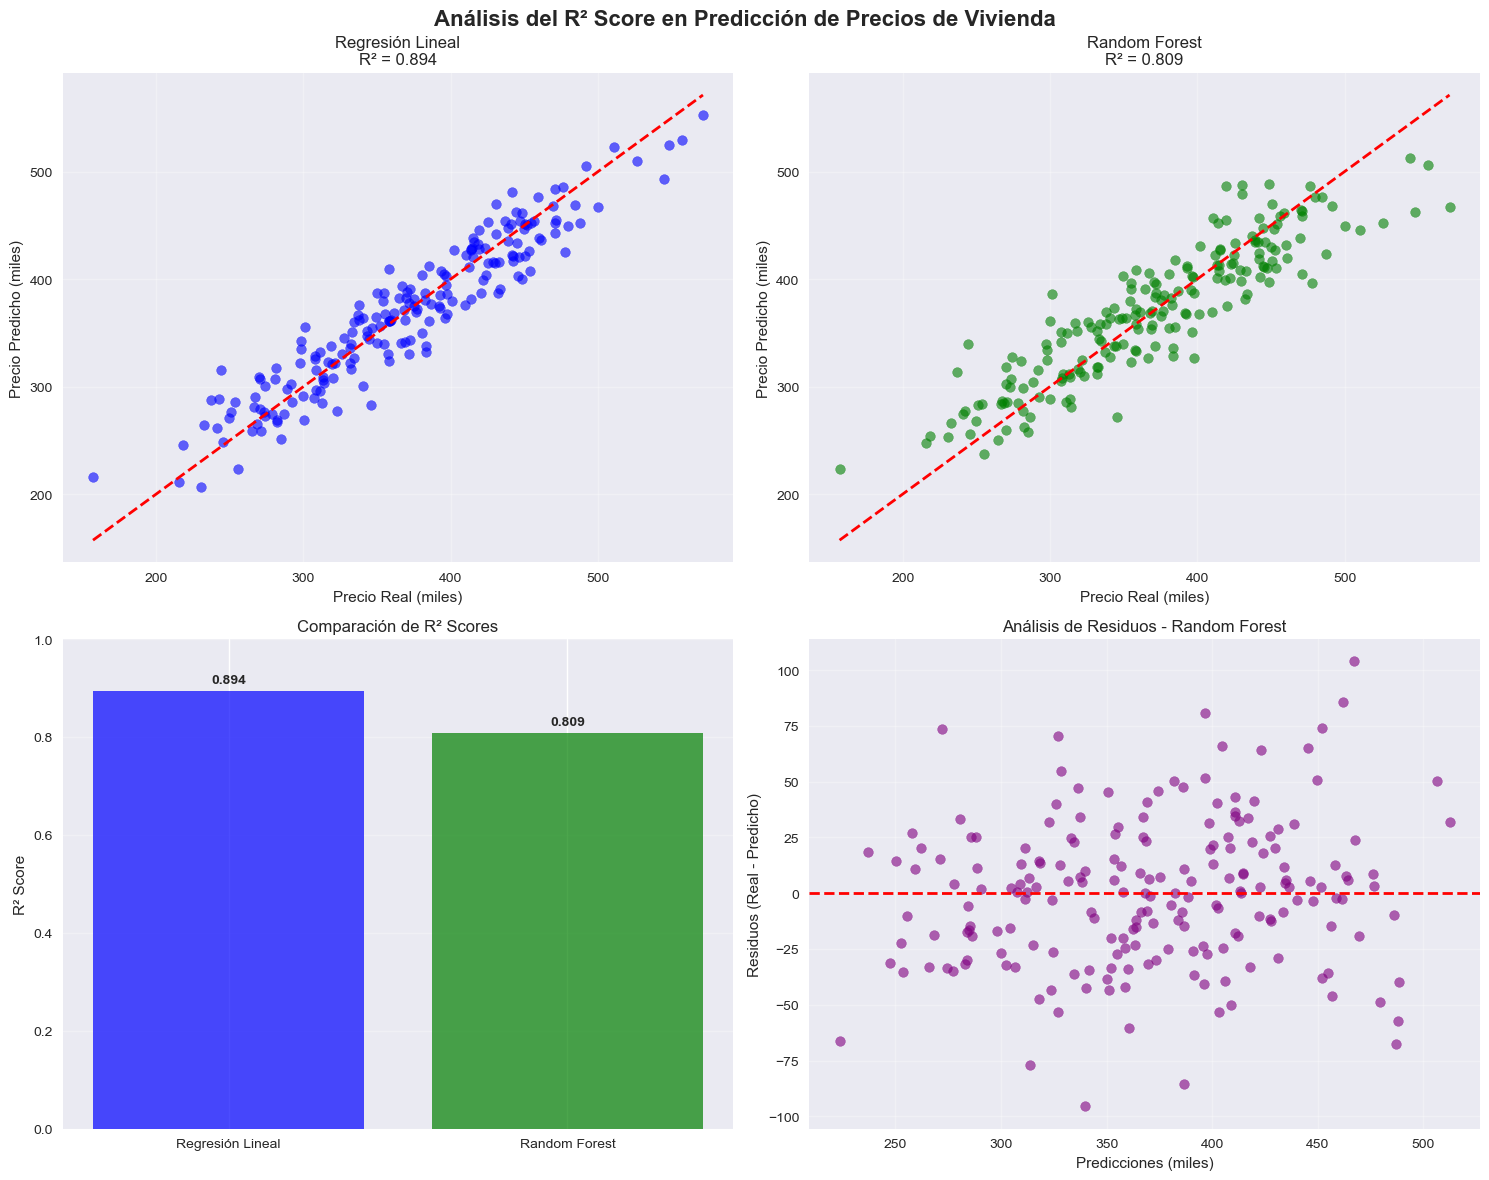

In [12]:
# 6. Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del R² Score en Predicción de Precios de Vivienda',
             fontsize=16, fontweight='bold')

# Gráfico 1: Regresión Lineal
ax1 = axes[0, 0]
ax1.scatter(y_test, predictions['Regresión Lineal'], alpha=0.6, color='blue')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Precio Real (miles)')
ax1.set_ylabel('Precio Predicho (miles)')
ax1.set_title(f'Regresión Lineal\nR² = {r2_score(y_test, predictions["Regresión Lineal"]):.3f}')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Random Forest
ax2 = axes[0, 1]
ax2.scatter(y_test, predictions['Random Forest'], alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Precio Real (miles)')
ax2.set_ylabel('Precio Predicho (miles)')
ax2.set_title(f'Random Forest\nR² = {r2_score(y_test, predictions["Random Forest"]):.3f}')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Comparación de R²
ax3 = axes[1, 0]
model_names = [r['Modelo'] for r in results]
r2_scores = [r['R² Score'] for r in results]
bars = ax3.bar(model_names, r2_scores, color=['blue', 'green'], alpha=0.7)
ax3.set_ylabel('R² Score')
ax3.set_title('Comparación de R² Scores')
ax3.set_ylim(0, 1)
ax3.grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars, r2_scores):
    ax3.text(bar.get_x() + bar.get_width()/2., score + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Residuos
ax4 = axes[1, 1]
residuals = y_test - predictions['Random Forest']
ax4.scatter(predictions['Random Forest'], residuals, alpha=0.6, color='purple')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicciones (miles)')
ax4.set_ylabel('Residuos (Real - Predicho)')
ax4.set_title('Análisis de Residuos - Random Forest')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
# 7. Interpretación de resultados
print("\n--- Interpretación para el negocio ---")
best_model = max(results, key=lambda x: x['R² Score'])
print(f"Mejor modelo: {best_model['Modelo']}")
print(f"R² Score: {best_model['R² Score']:.3f}")
print(f"\nEsto significa que:")
print(f"• El modelo explica {best_model['R² Score']*100:.1f}% de la variabilidad en precios")
print(f"• Queda un {(1-best_model['R² Score'])*100:.1f}% sin explicar")
print(f"• Es {best_model['R² Score']*100:.1f}% mejor que usar el promedio como predicción")



--- Interpretación para el negocio ---
Mejor modelo: Regresión Lineal
R² Score: 0.894

Esto significa que:
• El modelo explica 89.4% de la variabilidad en precios
• Queda un 10.6% sin explicar
• Es 89.4% mejor que usar el promedio como predicción


In [16]:
# 8. Demostración de un modelo muy malo
print("\n--- ¿Qué pasa si el modelo es muy malo? ---")

terrible_predictions = np.full_like(y_test, y_test.mean() + 100)
r2_terrible = r2_score(y_test, terrible_predictions)

print(f"R² con predicciones terribles: {r2_terrible:.3f}")
print("Interpretación: Un R² negativo indica que el modelo es peor que usar la media.")



--- ¿Qué pasa si el modelo es muy malo? ---
R² con predicciones terribles: -1.778
Interpretación: Un R² negativo indica que el modelo es peor que usar la media.
